In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
# replacing blanks with 0 as tenure is 0 and no total charges are recorded
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
df.isnull().sum().sum()

np.int64(0)

In [49]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [50]:
df["customerID"].duplicated().sum()

np.int64(0)

In [51]:
def conv(value):

    if value == 1:

        return 'yes'

    else:

        return 'no'
    
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#convetrted 0 and 1 values of senior citizen to yes/no to make it easier to understand

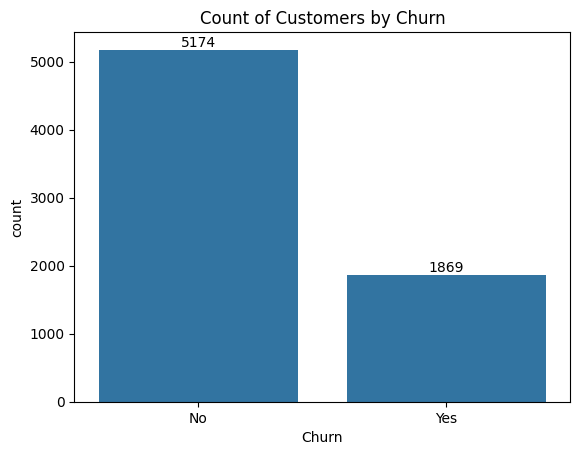

In [6]:
ax= sns.countplot(data=df, x='Churn')

ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.savefig('Customer_Churn.png', dpi=300, bbox_inches='tight')
plt.show()

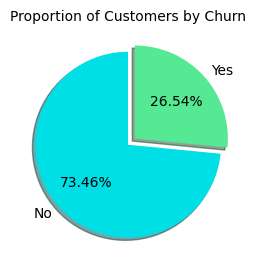

,Churn
Churn,
No,5174
Yes,1869


In [7]:
plt.figure(figsize=(3,4))
gb = df.groupby('Churn').agg({'Churn': "count"})
colors = ["#00DEE6", "#56E993"]
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%', startangle=90, colors=colors, explode=[0, 0.1], shadow=True)
plt.title('Proportion of Customers by Churn', fontsize=10)
plt.savefig('Churn_Pie_Chart.png', dpi=300, bbox_inches='tight')
plt.show()

gb

#from the given pie chart we can conclude that 26.54% of our customers have churned out.

#now let's explore the reason behind it

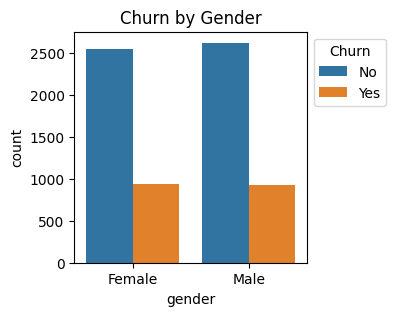

In [8]:
plt.figure(figsize=(3,3))
sns.countplot(x= "gender", data= df, hue= "Churn")
plt.title('Churn by Gender')
plt.legend(title='Churn', bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('churn_gender_plot.png', dpi=300, bbox_inches='tight')
plt.show()

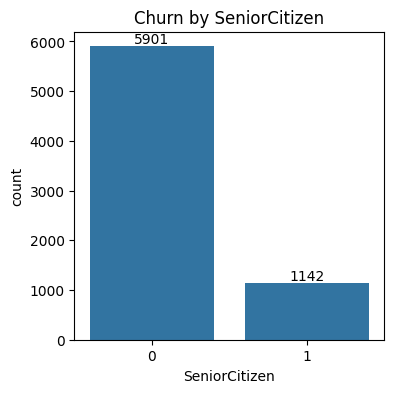

In [9]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x= "SeniorCitizen", data= df)
ax.bar_label(ax.containers[0])
plt.title('Churn by SeniorCitizen')
plt.savefig('churn_senior_citizen_plot.png', dpi=300, bbox_inches='tight')
plt.show()

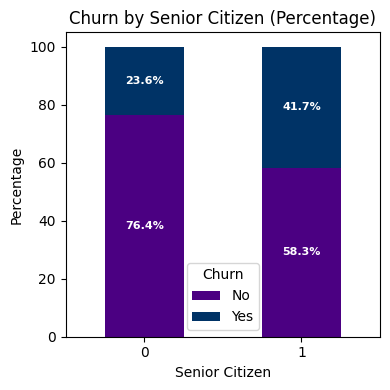

In [10]:
# Step 1: Create a crosstab of SeniorCitizen vs Churn
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert counts to percentages
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
fig, ax = plt.subplots(figsize=(4, 4))
bars = ct_percent.plot(kind='bar', stacked=True, ax=ax, color=['#4B0082', '#003366'])

# Step 4: Add percentage labels
for i, row in enumerate(ct_percent.values):
    cum_height = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, cum_height + val / 2, f'{val:.1f}%', ha='center', va='center',
                    color='white', fontsize=8, fontweight='bold')
            cum_height += val

# Step 5: Final touches
plt.title("Churn by Senior Citizen (Percentage)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.tight_layout()
plt.savefig('churn_senior_citizen_percentage_plot.png', dpi=300, bbox_inches='tight')
plt.show()

#Comparative a greater percentage of people in senior citizen category have churned.

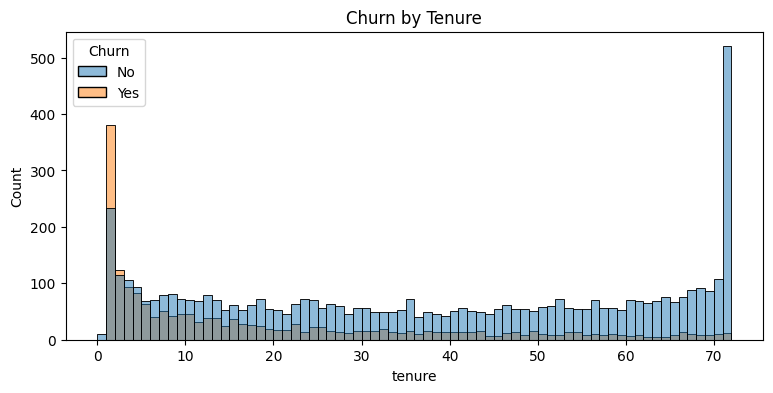

In [11]:
plt.figure(figsize=(9,4))
sns.histplot(data=df, x='tenure', bins=72,hue='Churn')
plt.title('Churn by Tenure')
plt.savefig('churn_tenure_plot.png', dpi=300, bbox_inches='tight')
plt.show()

#People who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned.

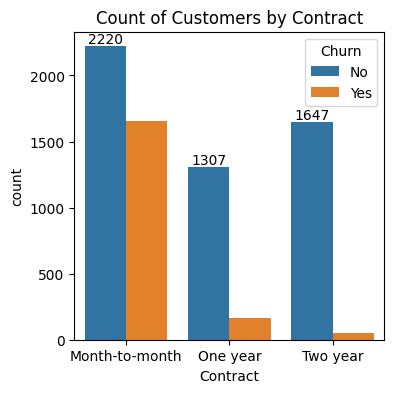

In [12]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x= "Contract", data= df, hue= "Churn")
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Contract')
plt.savefig('churn_contract_plot.png', dpi=300, bbox_inches='tight')
plt.show()

#People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

In [82]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

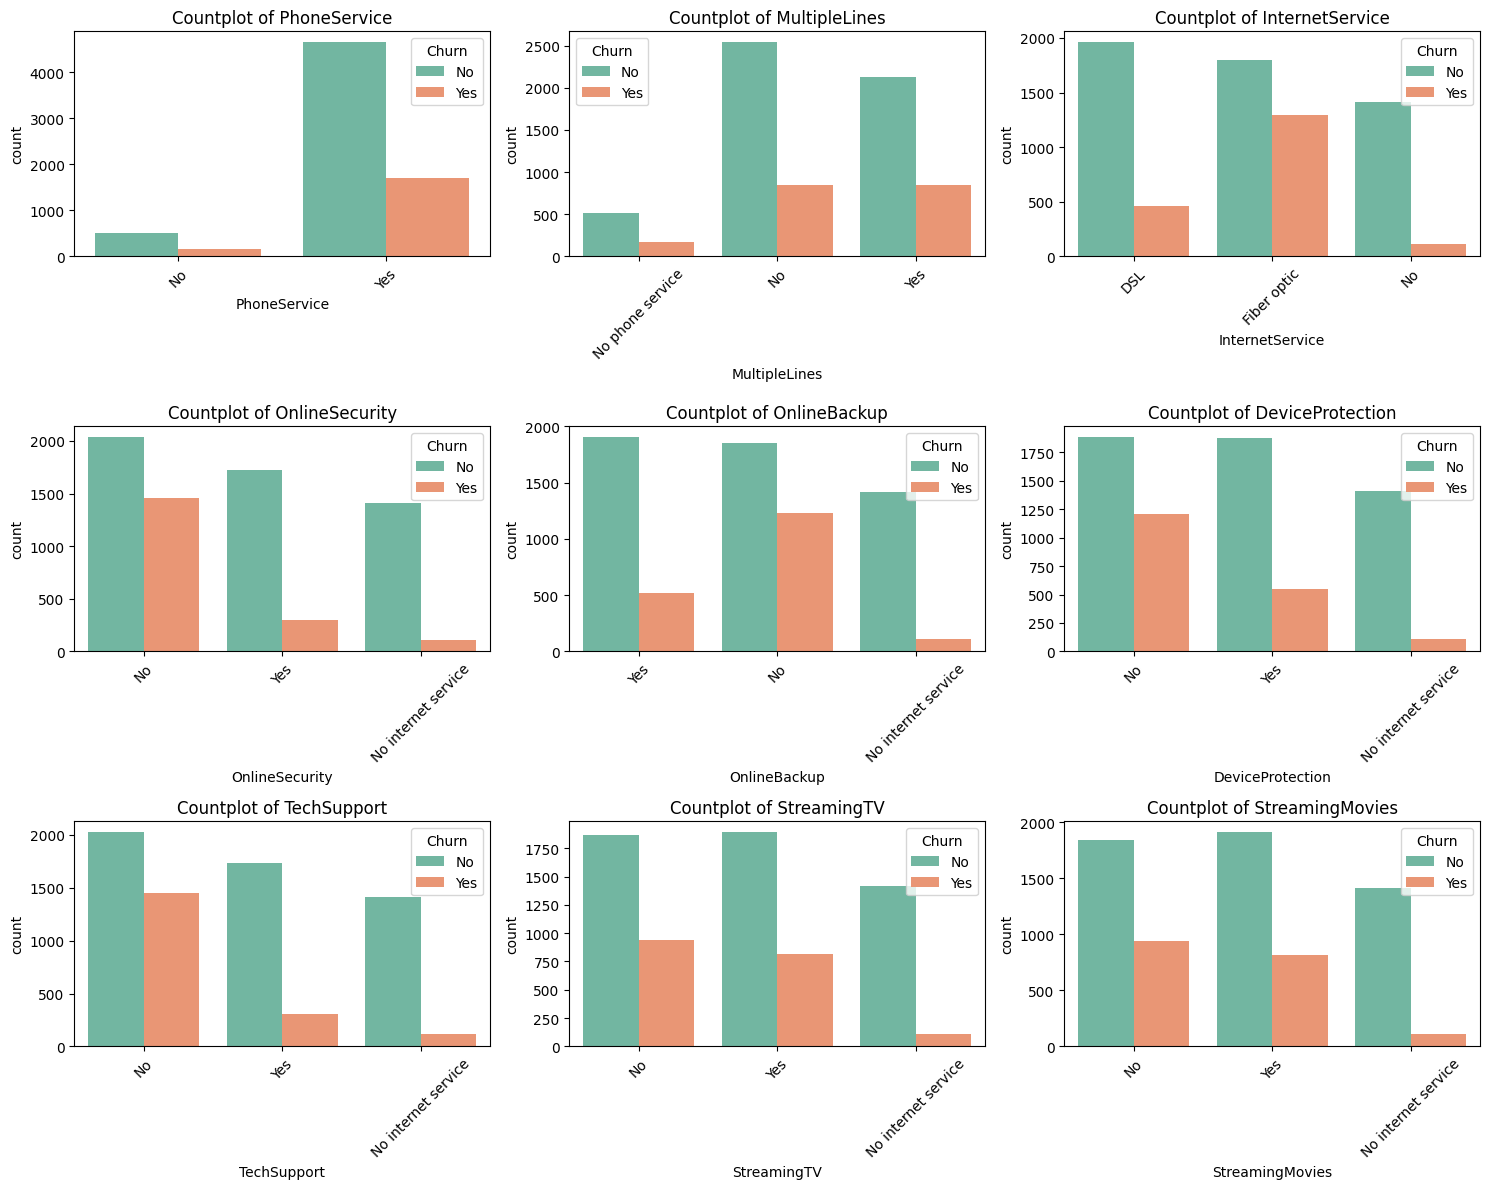

In [13]:
# List of categorical columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up subplot grid
n_cols = 3  # Number of plots per row
n_rows = -(-len(cols) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Plot each countplot
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', hue= 'Churn')
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('churn_categorical_plots.png', dpi=300, bbox_inches='tight')
plt.show()

#Customers who lack services like OnlineSecurity, TechSupport, or DeviceProtection tend to churn more frequently. Fiber optic internet users show the highest churn among internet types. Streaming services are associated with higher churn, while customers without internet service churn less. Overall, value-added support features appear to improve retention.

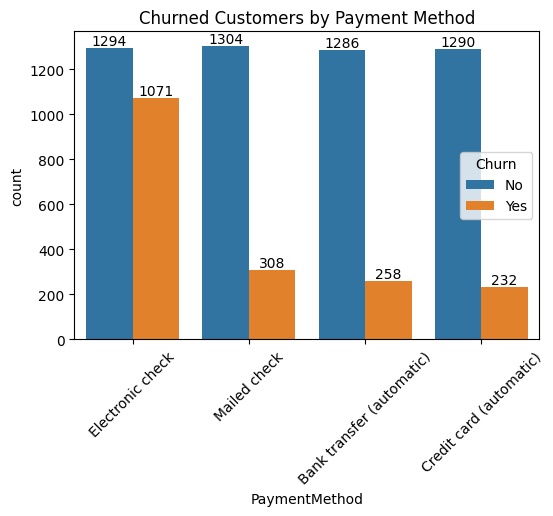

In [14]:
plt.figure(figsize=(6,4))
ax= sns.countplot(x= "PaymentMethod", data= df, hue= "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned Customers by Payment Method')
plt.xticks(rotation=45)
plt.savefig('churn_payment_method_plot.png', dpi=300, bbox_inches='tight')
plt.show()

#Customers are likely to churn when they are using electronic check as a payment method.